In [2]:
#installing all the necesaary packages and dictionaries

# conda install -c conda-forge imbalanced-learn

In [7]:
pip install graphviz;

Note: you may need to restart the kernel to use updated packages.


In [8]:
conda install python-graphviz;

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plot-metric;

Note: you may need to restart the kernel to use updated packages.


In [10]:
#importing required packages
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.metrics import average_precision_score

In [11]:
credit = pd.read_csv('df_cleaned.csv')
pd.set_option('display.max_columns', 999)
credit.head()

,default_payment_next_month,limit_bal,age,limit_used_sep,score_3mo,score_6mo,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,id,sex,education,marital_status,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,pay_mode3,pay_mode3_cat,pay_sep_cat,pay_aug_cat,pay_jul_cat,pay_jun_cat,pay_may_cat,pay_apr_cat,age_cat
0,1,20000,24,0.195650,3,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,2,2,1,2,2,-1,-1,-2,-2,2,1,1,1,-1,-1,-1,-1,20-29
1,1,120000,26,0.022350,1,3,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,2,2,2,2,-1,2,0,0,0,2,-1,-1,-1,1,0,0,0,1,20-29
2,0,90000,34,0.324878,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30-39
3,0,50000,37,0.939800,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,4,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30-39
4,0,50000,57,0.172340,-2,-2,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,5,1,2,1,-1,0,-1,0,0,0,-1,-1,-1,0,-1,0,0,0,50-59


In [12]:
#Since the target is to default next month, we set our predictor variables to include all columns except target
X = credit.drop(['default_payment_next_month', 'id', 'age_cat'], axis = 1)
y = credit['default_payment_next_month']

In [13]:
#normalising the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)
X.head()

,limit_bal,age,limit_used_sep,score_3mo,score_6mo,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,sex,education,marital_status,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,pay_mode3,pay_mode3_cat,pay_sep_cat,pay_aug_cat,pay_jul_cat,pay_jun_cat,pay_may_cat,pay_apr_cat
0,0.018519,0.071429,0.226551,0.600000,0.357143,0.054856,0.220041,0.156710,0.177262,0.192761,0.303271,0.000000,0.009241,0.000000,0.000000,0.000000,0.000000,1.0,0.333333,0.0,0.666667,0.571429,0.142857,0.142857,0.000000,0.00,0.666667,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.203704,0.119048,0.134507,0.466667,0.535714,0.050487,0.215883,0.163382,0.188720,0.205325,0.313722,0.000000,0.013412,0.017265,0.019305,0.000000,0.034483,1.0,0.333333,0.5,0.166667,0.571429,0.285714,0.285714,0.222222,0.50,0.166667,0.0,0.0,1.0,0.5,0.5,0.5,1.0
2,0.148148,0.309524,0.295187,0.400000,0.428571,0.144730,0.253026,0.199791,0.227450,0.247120,0.353105,0.027455,0.020118,0.017265,0.019305,0.019945,0.086207,1.0,0.333333,0.5,0.333333,0.285714,0.285714,0.285714,0.222222,0.25,0.333333,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,0.074074,0.380952,0.621787,0.400000,0.428571,0.207723,0.356303,0.319399,0.276420,0.298071,0.397968,0.036172,0.027079,0.020718,0.021236,0.021322,0.017241,1.0,0.333333,0.0,0.333333,0.285714,0.285714,0.285714,0.222222,0.25,0.333333,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,0.074074,0.857143,0.214170,0.266667,0.357143,0.071549,0.227794,0.274357,0.250595,0.262386,0.364585,0.036172,0.491973,0.172652,0.173745,0.013742,0.011707,0.0,0.333333,0.0,0.166667,0.285714,0.142857,0.285714,0.222222,0.25,0.166667,0.0,0.0,0.5,0.0,0.5,0.5,0.5


In [14]:
#The first step is to split our data into training and testing using an 80-20 train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# EDA

In [18]:
credit_default = credit.loc[credit['default_payment_next_month'] == 1]
pd.set_option('display.max_columns', 999)
credit_default.head()

,default_payment_next_month,limit_bal,age,limit_used_sep,score_3mo,score_6mo,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,id,sex,education,marital_status,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,pay_mode3,pay_mode3_cat,pay_sep_cat,pay_aug_cat,pay_jul_cat,pay_jun_cat,pay_may_cat,pay_apr_cat,age_cat
0,1,20000,24,0.195650,3,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,2,2,1,2,2,-1,-1,-2,-2,2,1,1,1,-1,-1,-1,-1,20-29
1,1,120000,26,0.022350,1,3,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,2,2,2,2,-1,2,0,0,0,2,-1,-1,-1,1,0,0,0,1,20-29
11,1,70000,30,0.940029,5,7,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,14,1,2,2,1,2,2,0,0,2,2,1,1,1,1,0,0,1,30-39
14,1,20000,24,0.768800,2,8,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,17,1,1,2,0,0,2,2,2,2,0,0,0,0,1,1,1,1,20-29
18,1,120000,39,0.002633,-3,-6,316,316,316,0,632,316,316,316,0,632,316,0,22,2,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,30-39


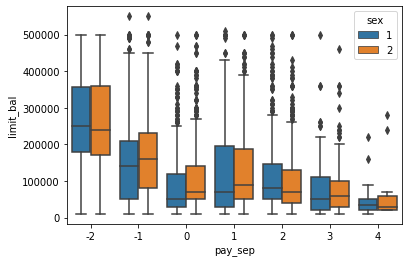

In [20]:
ax = sns.boxplot(x='pay_sep', y='limit_bal', hue = 'sex', data = credit_default)

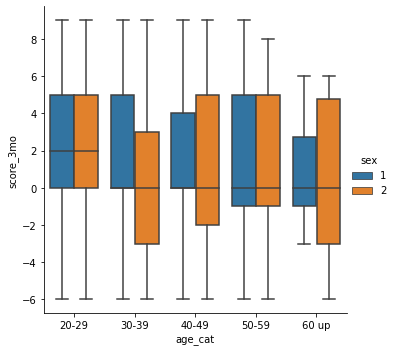

In [22]:
sns.catplot(x="age_cat", y="score_3mo", hue="sex", kind="box", data=credit_default)

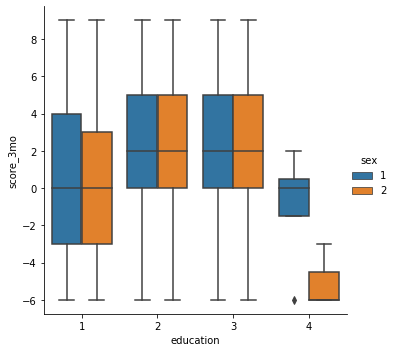

In [24]:
sns.catplot(x="education", y="score_3mo", hue="sex", kind="box", data=credit_default)

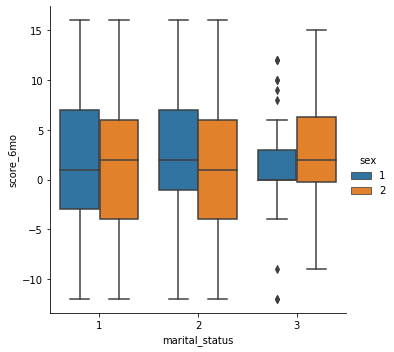

In [25]:
sns.catplot(x="marital_status", y="score_6mo", hue="sex", kind="box", data=credit_default)

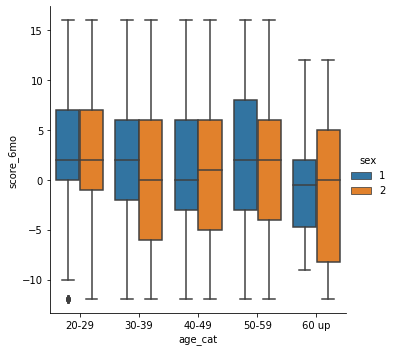

In [26]:
sns.catplot(x="age_cat", y="score_6mo", hue="sex", kind="box", data=credit_default)

# Classifiers - Decision Tree

In [27]:
#since our classes are imbalanced i.e. we have more non-defaulters, compared to defaulters, we have to res
#resample to balance the two. 
from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 20424), (1, 20424)]


In [28]:
#Creating an instance of a decision tree classifier with random state = 10 for reproducibility
#Instantiate and fit the training data to the classifier

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10) 

In [29]:
#train decision tree classifier

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [30]:
#predict the response for test dataset

predict_proba = tree_clf.predict(X_test)
predict_proba

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
#Checking feature importance
tree_clf.feature_importances_

array([0.04056114, 0.00206117, 0.02495652, 0.64425686, 0.0177093 ,
       0.03780109, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01027608, 0.        , 0.07325915, 0.00463111,
       0.00494303, 0.00503726, 0.        , 0.        , 0.00232731,
       0.11633426, 0.        , 0.        , 0.00740557, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00844016, 0.        ])

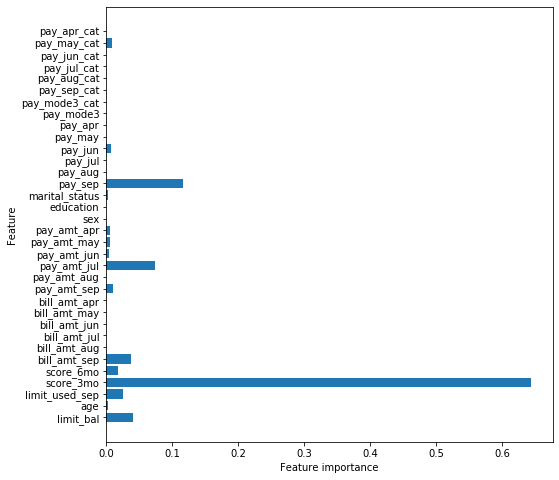

In [32]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [33]:
#creating classification report 
print(classification_report(y_test, predict_proba))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4106
           1       0.67      0.38      0.49      1181

    accuracy                           0.82      5287
   macro avg       0.75      0.66      0.69      5287
weighted avg       0.80      0.82      0.80      5287



In [34]:
#create and print a confusion matrix

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, predict_proba, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,3882,224,4106
1,730,451,1181
All,4612,675,5287


In [36]:
#checking predictive performance

acc = accuracy_score(y_test, predict_proba)*100
print('Accuracy is :{0}'.format(acc))

Accuracy is :81.95574049555515


In [37]:
#checking auc for predictions

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.66


In [44]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predict_proba)
print(precision, recall, thresholds)

[0.2233781  0.66814815 1.        ] [1.         0.38187976 0.        ] [0 1]


In [45]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predict_proba)
f1

0.4859913793103448

In [46]:
#calculating the auc
precision_recall_auc = auc(recall, precision)
precision_recall_auc

0.5940512167372005

In [47]:
#check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6636627260740257

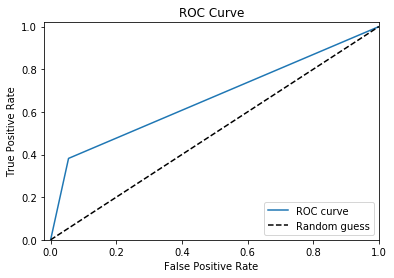

In [48]:
#plot the auc-roc curve 

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, predict_proba)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

NameError: name 'average_recall' is not defined

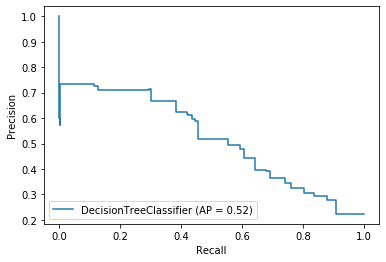

In [50]:
#plot the precision-recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(tree_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AR={0:0.2f}'.format(average_recall))
disp.fit(X_train, y_train)
disp.score(X_test, predict_proba)
disp.show()

In [51]:
average_precision = average_precision_score(y_test, predict_proba)
print(average_precision)

0.39322677881889867


In [53]:
from sklearn.metrics import recall_score

In [54]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, predict_proba) * 100))

Testing Accuracy for Decision Tree Classifier: 81.96%


In [55]:
#instantiate and fit a random tree classifier using entropy

classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [56]:
# Create DOT data
dot_data = export_graphviz(classifier_2, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

In [57]:
# Draw graph
graph = graph_from_dot_data(dot_data)  

In [58]:
Show graph
Image(graph.create_png())

SyntaxError: invalid syntax (<ipython-input-58-a0413b621836>, line 1)

# Fitting a RandomForestClassifier 

In [ ]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
# checking mean accuracy on the training and testing data of the model
# training accuracy score

forest.score(X_train, y_train)

In [ ]:
# testing accuracy score

forest.score(X_test, y_test)

In [ ]:
plot_feature_importances(forest)

In [ ]:
first_tree = best_model.estimators_[1]
imps = first_tree.feature_importances_
imps

In [ ]:
for i in range(100):
    first_tree = best_model.estimators_[i]
    imps = first_tree.feature_importances_
    for j in range(len(imps)):
        if imps[j]==0:
            print('missing var at {} position {}'.format(i,j))

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(first_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
list(best_model.feature_importances_)

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)

In [61]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
probas = model.predict_proba(X_test)

In [63]:
from sklearn.metrics import roc_curve,auc
fpr,tpr, thrsh = roc_curve(y_test,probas[:,1])
auc(fpr,tpr)

0.754445385266723

In [64]:
from sklearn.metrics import precision_recall_curve
precision,recall,thrsh = precision_recall_curve(y_test,probas[:,1])
auc(fpr,tpr)

0.754445385266723

In [65]:
print(classification_report(y_test, predict_proba))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4106
           1       0.67      0.38      0.49      1181

    accuracy                           0.82      5287
   macro avg       0.75      0.66      0.69      5287
weighted avg       0.80      0.82      0.80      5287



# instantiating a bagging classifier

In [66]:
#trying the bagged tree method

bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), n_estimators=20)

In [67]:
#fit to the training data

bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [68]:
#calculating the accuracy score of the bagging tree using training data and labels as variables
bagged_tree.score(X_train, y_train)

0.8194457580629906

In [69]:
#testing the accuracy score
bagged_tree.score(X_test, y_test)

0.8182334026858332

# Hyperparameter tuning and pruning 

In [70]:
#creating a vanilla classifier to set our baseline model
#instantiating a decision tree and fit classifier to the training data

SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [73]:
tree_clf = DecisionTreeClassifier()
tree_cv_score = cross_val_score(tree_clf, X_train, y_train, cv=3)
mean_tree_cv_score = np.mean(tree_cv_score)

print(f"Mean Cross Validation Score: {mean_tree_cv_score : .2%}")

Mean Cross Validation Score:  71.32%


In [74]:
print("our model performed fairly though there is room for improvement")

our model performed fairly though there is room for improvement


In [75]:
print("Trying GridSearchCV for hyperparameter tuning our model using Combinatoric Grid Searching")

Trying GridSearchCV for hyperparameter tuning our model using Combinatoric Grid Searching


# Hyperparameter Optimisation

In [76]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3, 5, 7],'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(model,param_grid,cv=10,scoring='f1')
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

{'max_depth': 7, 'min_samples_leaf': 5}

In [78]:
cv_table = pd.DataFrame(opt_model.cv_results_)
columns = ["rank_test_score", "params", "mean_test_score", "std_test_score"]
cv_table[columns]

,rank_test_score,params,mean_test_score,std_test_score
0,8,"{'max_depth': 3, 'min_samples_leaf': 5}",0.452381,0.020794
1,9,"{'max_depth': 3, 'min_samples_leaf': 10}",0.451708,0.019354
2,7,"{'max_depth': 3, 'min_samples_leaf': 15}",0.461791,0.012182
3,2,"{'max_depth': 5, 'min_samples_leaf': 5}",0.469234,0.012283
4,4,"{'max_depth': 5, 'min_samples_leaf': 10}",0.468388,0.012176
5,6,"{'max_depth': 5, 'min_samples_leaf': 15}",0.467724,0.011536
6,1,"{'max_depth': 7, 'min_samples_leaf': 5}",0.469588,0.010334
7,3,"{'max_depth': 7, 'min_samples_leaf': 10}",0.468678,0.013733
8,5,"{'max_depth': 7, 'min_samples_leaf': 15}",0.467939,0.011601


In [79]:
from pandas_ml import ConfusionMatrix
y_pred_gs = best_model.predict(X_test)
cm_gs = ConfusionMatrix(y_test, y_pred_gs)
print(cm_gs)
print('Precision is:'+str(round(precision_score(y_test, y_pred_gs),2)))
print('Recall is:'+str(round(recall_score(y_test, y_pred_gs, average='binary'),2)))
print('F1 score is:'+str(round(f1_score(y_test, y_pred_gs, average='binary'),2)))

ModuleNotFoundError: No module named 'pandas_ml'

In [ ]:
from sklearn.metrics import roc_curve,auc

probas = best_model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test,probas[:,1])
plt.plot(fpr,tpr)
auc(fpr,tpr)

In [ ]:
# # Create a box plot of each column
# plt.figure(figsize=(20, 10))
# plt.boxplot([credit[col] for col in credit.columns])
# plt.title("Box plot of all columns in dataset")
# plt.xticks(range(len(credit.columns.values)), credit.columns.values)
# plt.show()

In [ ]:
# set(credit['limit_used_sep']);

In [ ]:
# ax = sns.swarmplot(x='pay_sep', y='limit_bal', data = credit_default)

In [ ]:
# ax = sns.boxplot(x='education', y='pay_sep', hue = 'sex', data = credit_default)

In [ ]:
# boxplot = credit_default.boxplot(column = ['pay_3mos'], by = 'sex')

In [ ]:
# boxplot = credit_default.boxplot(column = ['pay_3mos'], by = 'education')

In [ ]:
# boxplot = credit_default.boxplot(column = ['pay_3mos'], by = 'marital_status')

In [ ]:
# sns.catplot(x="education", y="pay_3mos", hue="sex", kind="box", data=credit_default)

In [ ]:
# sns.catplot(x="marital_status", y="pay_3mos", hue="sex", kind="box", data=credit_default)

In [ ]:
# boxplot = credit_default.boxplot(column = ['pay_3mos'], by = 'education')

In [ ]:
# credit_no_default = credit.loc[credit['default_payment_next_month'] == 0]
# credit_no_default

In [ ]:
# boxplot = credit_no_default.boxplot(column = ['pay_3mos'], by = 'sex')

In [ ]:
# boxplot = credit_no_default.boxplot(column = ['pay_3mos'], by = 'education')

In [ ]:
# boxplot = credit_no_default.boxplot(column = ['pay_3mos'], by = 'marital_status')

In [ ]:
# boxplot = credit_no_default.boxplot(column = ['pay_3mos'], by = 'age_cat')

In [ ]:
# ax = sns.boxplot(x='pay_sep', y='limit_bal', hue = 'sex', data = credit_no_default)

In [ ]:
# ax = sns.boxplot(x='education', y='pay_sep', hue = 'sex', data = credit_no_default)

In [ ]:
# df_balance = df.groupby(['EDUCATION', 'SEX']).size()
# plot_df_balance = df_balance.plot(title = 'education level', kind='bar')
# plot_df_balance.set_xlabel('education by gender')
# plot_df_balance.set_ylabel('frequency')

In [ ]:
# df.groupby('SEX')['EDUCATION'].count().plot(kind='bar')
# plt.show()

In [ ]:
# df.groupby(['AGE', 'LIMIT_BAL'])['LIMIT_BAL'].count().plot.bar(figsize=(8,6))

In [ ]:
# sns.pairplot(df)
# plt.show();